In [737]:
import yfinance as yf
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [738]:
adani = yf.Ticker("ADANIENT.NS")

In [739]:
recent_data = yf.download("ADANIENT.NS", period="16y")


[*********************100%%**********************]  1 of 1 completed


In [740]:
print(recent_data.columns)
recent_data.drop('Adj Close', axis=1, inplace=True)
print(recent_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


[*********************100%%**********************]  1 of 1 completed


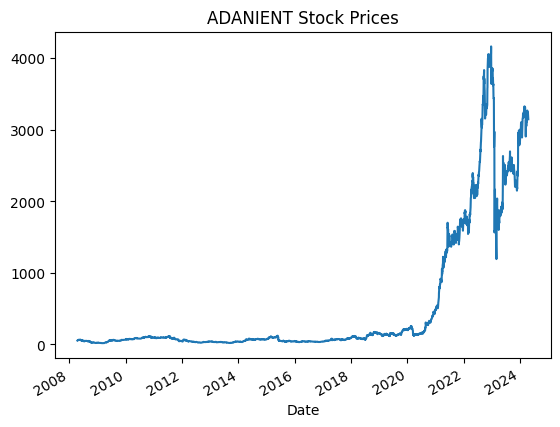

In [741]:
import matplotlib.pyplot as plt

data = yf.download("ADANIENT.NS", period='16y')
data['Close'].plot()
plt.title("ADANIENT Stock Prices")
plt.show()

# important

In [742]:
print(recent_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [743]:
print(recent_data)


                   Open         High          Low        Close   Volume
Date                                                                   
2008-04-15    50.963959    55.558376    50.596096    54.309185  1249100
2008-04-16    55.179020    56.290264    54.642559    55.320801  1031218
2008-04-17    56.711769    59.348103    56.328583    57.589272  1700720
2008-04-21    61.689381    61.689381    58.627708    60.294575   872431
2008-04-22    59.010899    61.677883    59.010899    60.658604  1556352
...                 ...          ...          ...          ...      ...
2024-04-08  3240.949951  3243.500000  3197.199951  3224.550049   577440
2024-04-09  3240.699951  3251.000000  3185.000000  3198.449951   833679
2024-04-10  3200.000000  3254.600098  3192.500000  3242.000000  1441138
2024-04-12  3210.000000  3247.500000  3205.300049  3209.899902   705173
2024-04-15  3150.000000  3180.300049  3103.199951  3147.449951  1034910

[3942 rows x 5 columns]


In [744]:
import pandas as pd
import numpy as np

# Assume 'stock_data' DataFrame contains open, high, low, close, and volume prices

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate short-term and long-term EMAs
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    macd_line = short_ema - long_ema

    # Calculate signal line
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD histogram
    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window).min()
    high_max = data['High'].rolling(window=window).max()
    stochastic_k = ((data['Close'] - low_min) / (high_max - low_min)) * 100
    stochastic_d = stochastic_k.rolling(window=3).mean()  # 3-day smoothing for %D line
    return stochastic_k, stochastic_d

def calculate_moving_averages(data, short_window=50, long_window=200):
    # Calculate short-term and long-term moving averages
    short_ma = data['Close'].rolling(window=short_window).mean()
    long_ma = data['Close'].rolling(window=long_window).mean()
    return short_ma, long_ma

def calculate_volume_indicators(data, window=20):
    # Calculate volume moving average
    volume_ma = data['Volume'].rolling(window=window).mean()
    # Calculate volume rate of change
    volume_roc = data['Volume'].pct_change(window)
    return volume_ma, volume_roc

def calculate_volatility_indicators(data, window=20):
    # Calculate Bollinger Bands
    std_dev = data['Close'].rolling(window=window).std()
    upper_band = data['Close'] + 2 * std_dev
    lower_band = data['Close'] - 2 * std_dev
    # Calculate Average True Range (ATR)
    high_low_range = data['High'] - data['Low']
    true_range = np.maximum(np.maximum((data['High'] - data['Low']).abs(), (data['High'] - data['Close'].shift()).abs()), (data['Low'] - data['Close'].shift()).abs())
    atr = true_range.rolling(window=window).mean()
    return upper_band, lower_band, atr

def williams_percent_r(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']

    # Calculate %R
    lowest_low = low.rolling(window=period).min()
    highest_high = high.rolling(window=period).max()
    percent_r = -100 * (highest_high - close) / (highest_high - lowest_low)

    return percent_r

# Calculate technical indicators
macd_line, signal_line, macd_histogram = calculate_macd(recent_data)
rsi = calculate_rsi(recent_data)
stochastic_k, stochastic_d = calculate_stochastic_oscillator(recent_data)
short_ma, long_ma = calculate_moving_averages(recent_data)
volume_ma, volume_roc = calculate_volume_indicators(recent_data)
upper_band, lower_band, atr = calculate_volatility_indicators(recent_data)

# Add calculated indicators to the DataFrame
recent_data['MACD_Line'] = macd_line
recent_data['Signal_Line'] = signal_line
recent_data['MACD_Histogram'] = macd_histogram
recent_data['RSI'] = rsi
recent_data['%K'] = stochastic_k
recent_data['%D'] = stochastic_d
recent_data['Short_MA'] = short_ma
recent_data['Long_MA'] = long_ma
recent_data['Volume_MA'] = volume_ma
recent_data['Volume_ROC'] = volume_roc
recent_data['Upper_Band'] = upper_band
recent_data['Lower_Band'] = lower_band
recent_data['ATR'] = atr
recent_data['%R']=williams_percent_r(recent_data)

# Print the DataFrame with calculated indicators
print(recent_data.shape[0])


3942


In [745]:
# Assuming your DataFrame is named 'df'
nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)


Percentage of NaN values in each column:
Open              0.000000
High              0.000000
Low               0.000000
Close             0.000000
Volume            0.000000
MACD_Line         0.000000
Signal_Line       0.000000
MACD_Histogram    0.000000
RSI               0.329782
%K                0.329782
%D                0.380518
Short_MA          1.243024
Long_MA           5.048199
Volume_MA         0.481989
Volume_ROC        0.507357
Upper_Band        0.481989
Lower_Band        0.481989
ATR               0.507357
%R                0.329782
dtype: float64


In [746]:
# Drop rows where 'Long_MA' column has NaN values
recent_data= recent_data.dropna(subset=['Long_MA'])

# Check the DataFrame after dropping rows
print(recent_data)

# Calculate the percentage of NaN values in each column
nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)


                   Open         High          Low        Close   Volume  \
Date                                                                      
2009-02-09    20.155670    20.692133    20.086697    20.393246  2141366   
2009-02-10    20.247635    21.987307    20.247635    20.841576  1062260   
2009-02-11    20.308945    21.056162    20.079033    20.795593   317703   
2009-02-12    20.998684    21.220930    20.385582    20.634653   227290   
2009-02-13    20.768770    21.611782    20.542688    20.991018   722792   
...                 ...          ...          ...          ...      ...   
2024-04-08  3240.949951  3243.500000  3197.199951  3224.550049   577440   
2024-04-09  3240.699951  3251.000000  3185.000000  3198.449951   833679   
2024-04-10  3200.000000  3254.600098  3192.500000  3242.000000  1441138   
2024-04-12  3210.000000  3247.500000  3205.300049  3209.899902   705173   
2024-04-15  3150.000000  3180.300049  3103.199951  3147.449951  1034910   

            MACD_Line  S

In [747]:
print(recent_data.shape[0])

3743


In [748]:
# Calculate the difference between Close and Open prices
# recent_data['Price_Move'] = np.where(recent_data['Close'] > recent_data['Open'], 1, -1)

# Calculate the average difference in price over the next 5 days
recent_data['Next_5_Days_Avg_Diff'] = recent_data['Close'].rolling(window=5).mean().shift(-5) - recent_data['Close']

# Drop rows with NaN values in 'Next_5_Days_Avg_Diff'
recent_data.dropna(subset=['Next_5_Days_Avg_Diff'], inplace=True)

# Calculate the price move
recent_data['Price_Move'] = np.where(recent_data['Next_5_Days_Avg_Diff'] > 0, 1, -1)

# Determine buy/sell signals
recent_data['Signal'] =0
recent_data.loc[(recent_data['%K'] > recent_data['%D']) , 'Signal'] = 1  # Buy signal
recent_data.loc[(recent_data['%K'] < recent_data['%D']) , 'Signal'] = -1  # Sell signal

print(recent_data)
# recent_data.drop(['Short_MA', 'Long_MA'], axis=1, inplace=True)
future_data = recent_data.tail(100)
recent_data = recent_data.iloc[:-100]
print(recent_data.shape[0])
print(future_data.shape[0])

                   Open         High          Low        Close   Volume  \
Date                                                                      
2009-02-09    20.155670    20.692133    20.086697    20.393246  2141366   
2009-02-10    20.247635    21.987307    20.247635    20.841576  1062260   
2009-02-11    20.308945    21.056162    20.079033    20.795593   317703   
2009-02-12    20.998684    21.220930    20.385582    20.634653   227290   
2009-02-13    20.768770    21.611782    20.542688    20.991018   722792   
...                 ...          ...          ...          ...      ...   
2024-04-01  3230.199951  3291.800049  3207.850098  3252.100098  1292646   
2024-04-02  3258.949951  3285.000000  3240.000000  3268.750000   868829   
2024-04-03  3250.000000  3260.149902  3222.000000  3233.449951  1153109   
2024-04-04  3250.000000  3273.000000  3201.699951  3210.800049  1403826   
2024-04-05  3211.100098  3234.000000  3178.949951  3224.800049   755607   

            MACD_Line  S

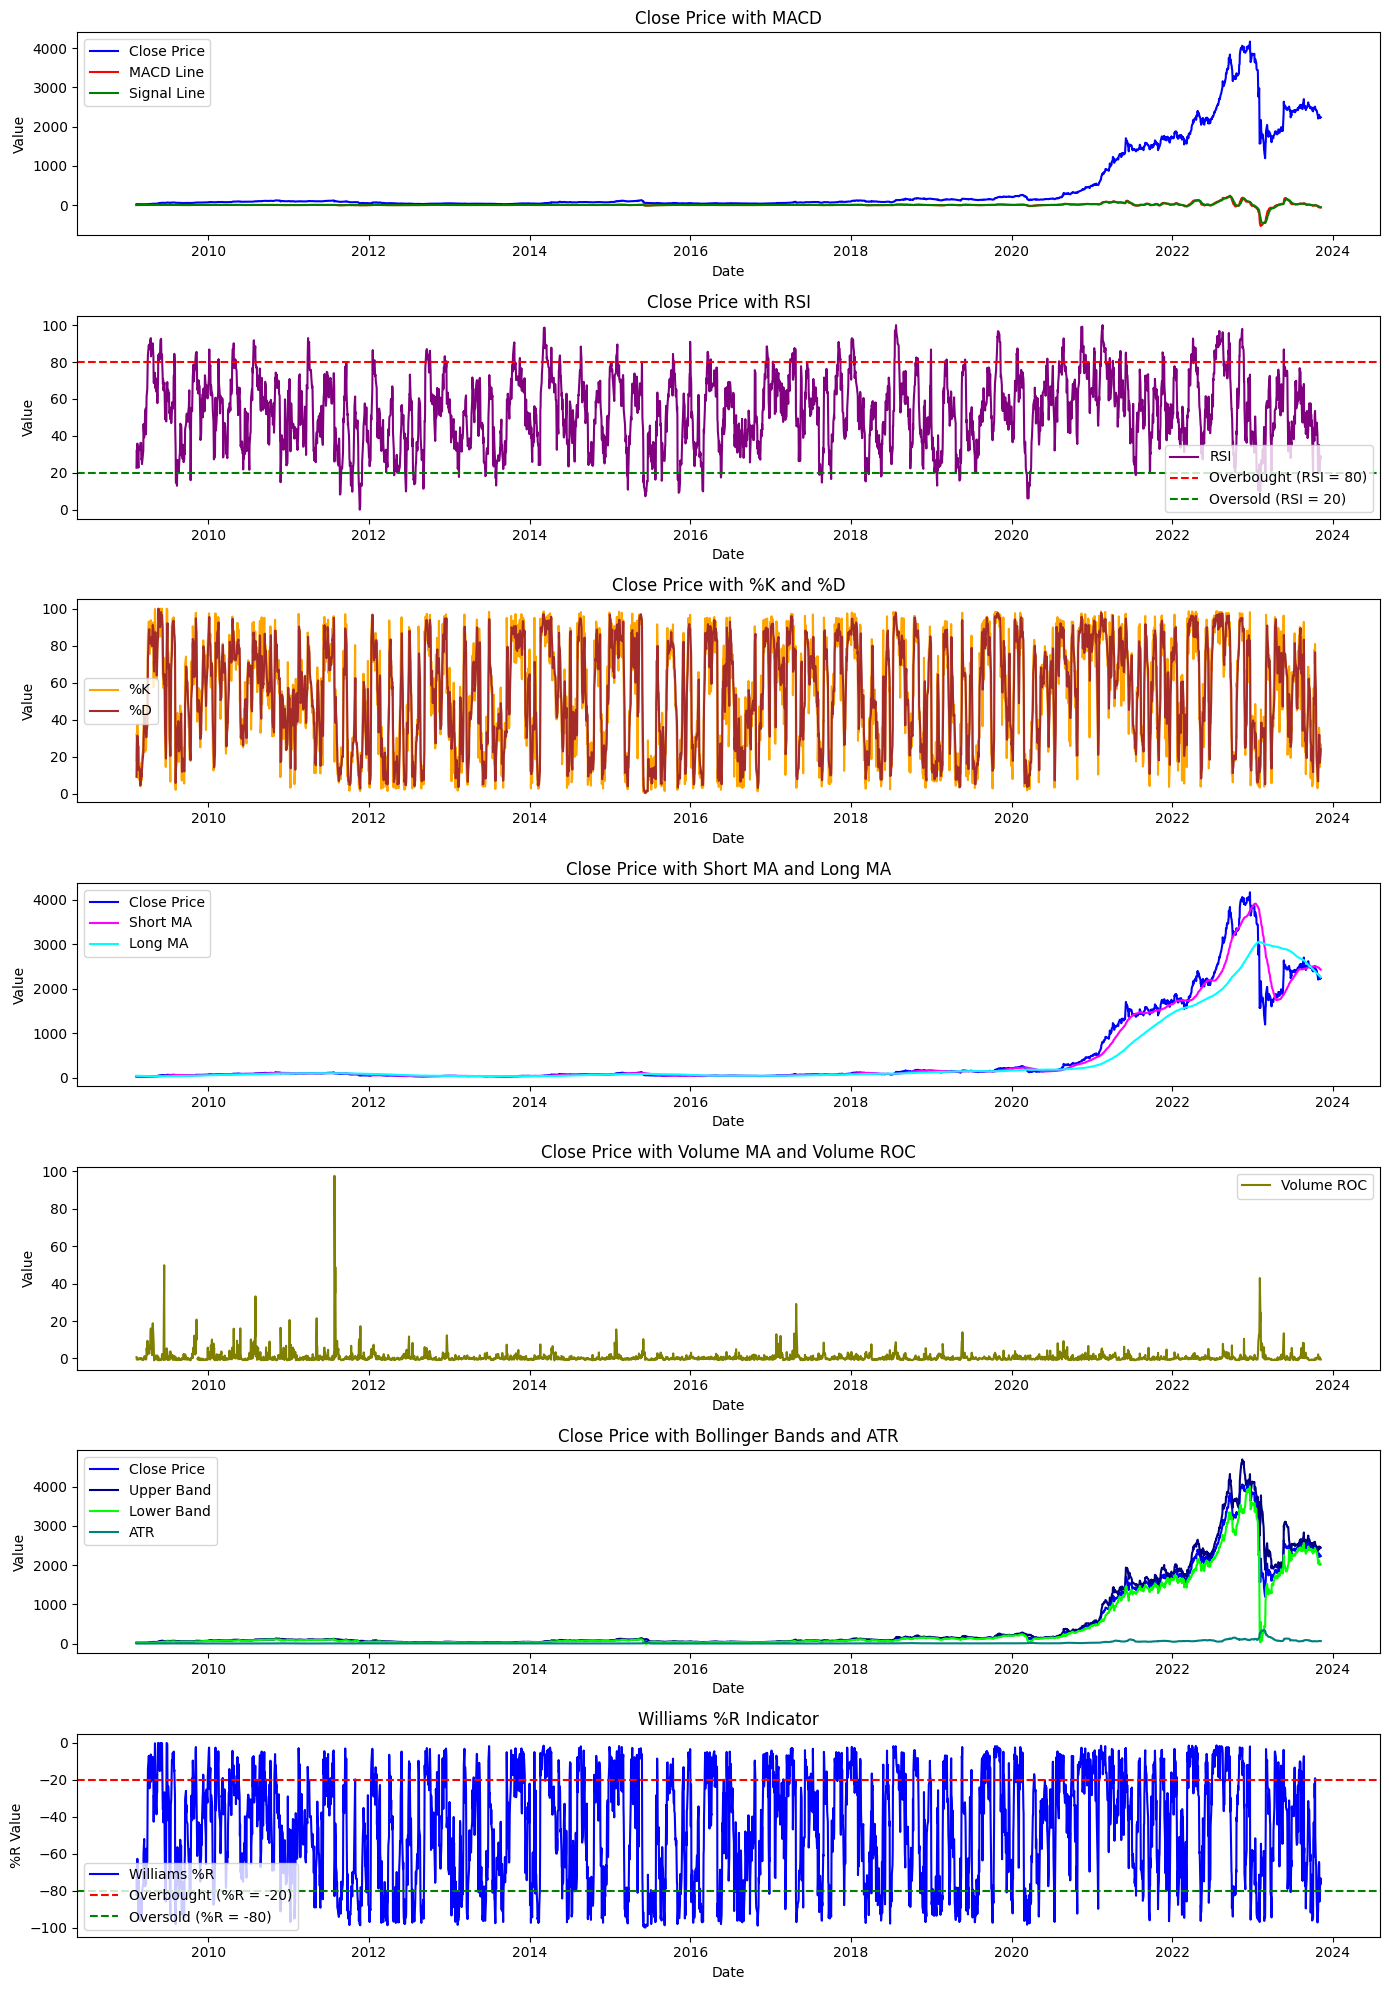

In [749]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume 'recent_data' DataFrame contains the necessary columns including Close price and the calculated indicators

# Plotting
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20))

# 1) Close price with MACD Line, Signal Line, and MACD Histogram
axs[0].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[0].plot(recent_data.index, recent_data['MACD_Line'], label='MACD Line', color='red')
axs[0].plot(recent_data.index, recent_data['Signal_Line'], label='Signal Line', color='green')
# axs[0].bar(recent_data.index, recent_data['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.5)
axs[0].set_title('Close Price with MACD')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Value')
axs[0].legend()

# 2) Close price with RSI

# axs[1].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[1].plot(recent_data.index, recent_data['RSI'], label='RSI', color='purple')

# Add horizontal lines for overbought and oversold conditions
axs[1].axhline(y=80, color='red', linestyle='--', label='Overbought (RSI = 80)')
axs[1].axhline(y=20, color='green', linestyle='--', label='Oversold (RSI = 20)')

axs[1].set_title('Close Price with RSI')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Value')
axs[1].legend()

# 3) Close price with %K and %D
# axs[2].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[2].plot(recent_data.index, recent_data['%K'], label='%K', color='orange')
axs[2].plot(recent_data.index, recent_data['%D'], label='%D', color='brown')
axs[2].set_title('Close Price with %K and %D')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Value')
axs[2].legend()

# 4) Close price with Short MA and Long MA
axs[3].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[3].plot(recent_data.index, recent_data['Short_MA'], label='Short MA', color='magenta')
axs[3].plot(recent_data.index, recent_data['Long_MA'], label='Long MA', color='cyan')
axs[3].set_title('Close Price with Short MA and Long MA')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Value')
axs[3].legend()

# 5) Close price with Volume MA and Volume ROC
# axs[4].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
# axs[4].plot(recent_data.index, recent_data['Volume_MA'], label='Volume MA', color='pink')
axs[4].plot(recent_data.index, recent_data['Volume_ROC'], label='Volume ROC', color='olive')
axs[4].set_title('Close Price with Volume MA and Volume ROC')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('Value')
axs[4].legend()

# 6) Close price with Upper Band, Lower Band, and ATR
axs[5].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[5].plot(recent_data.index, recent_data['Upper_Band'], label='Upper Band', color='navy')
axs[5].plot(recent_data.index, recent_data['Lower_Band'], label='Lower Band', color='lime')
axs[5].plot(recent_data.index, recent_data['ATR'], label='ATR', color='teal')
axs[5].set_title('Close Price with Bollinger Bands and ATR')
axs[5].set_xlabel('Date')
axs[5].set_ylabel('Value')
axs[5].legend()


# Plotting Williams %R
axs[6].plot(recent_data.index, recent_data['%R'], label='Williams %R', color='blue')
axs[6].axhline(y=-20, color='red', linestyle='--', label='Overbought (%R = -20)')
axs[6].axhline(y=-80, color='green', linestyle='--', label='Oversold (%R = -80)')
axs[6].set_title('Williams %R Indicator')
axs[6].set_xlabel('Date')
axs[6].set_ylabel('%R Value')
axs[6].legend()
# axs[6].grid(True)


plt.tight_layout()
plt.show()


cross section for macd and signal line

In [750]:
import pandas as pd
import numpy as np

# Assume 'recent_data' DataFrame contains the necessary columns including Close price, MACD_Line, Signal_Line, and Price_Move

# Initialize lists to store labels and targets
above_labels = []
below_labels = []
above_targets = []
below_targets = []

# Identify crossover points
for i in range(1, len(recent_data)):
    if recent_data['MACD_Line'][i] > recent_data['Signal_Line'][i] and recent_data['MACD_Line'][i - 1] <= recent_data['Signal_Line'][i - 1]:
        above_labels.append('MACD Line crossed above Signal Line')
        above_targets.append(recent_data['Price_Move'][i])
    elif recent_data['MACD_Line'][i] < recent_data['Signal_Line'][i] and recent_data['MACD_Line'][i - 1] >= recent_data['Signal_Line'][i - 1]:
        below_labels.append('MACD Line crossed below Signal Line')
        below_targets.append(recent_data['Price_Move'][i])



In [751]:
# Filter targets for label 1 occurrences in crosses above
percent_above_label_1 = (above_targets.count(1) / len(above_targets)) * 100
# Filter targets for label -1 occurrences in crosses below
percent_below_label_minus_1 = (below_targets.count(-1) / len(below_targets)) * 100

print(f"Percentage of label 1 occurrences in above target: {percent_above_label_1:.2f}%")
print(f"Percentage of label -1 occurrences in below target: {percent_below_label_minus_1:.2f}%")
print("Number of samples {:.2f}%".format((len(above_targets) + len(below_targets)) / recent_data.shape[0] * 100))


Percentage of label 1 occurrences in above target: 55.08%
Percentage of label -1 occurrences in below target: 56.78%
Number of samples 6.49%


In [752]:
# Assuming 'macd_line' and 'signal_line' are lists containing MACD line and signal line values
# Assuming 'crossed' is a boolean indicating whether the MACD line and signal line have crossed or not

# Define targets for label 1 (Up Wave) and label -1 (Down Wave)
targets = []  # Initialize empty list for targets
for i in range(len(macd_line)):
    if macd_line[i] > signal_line[i]:
        targets.append(1)  # Label 1 for MACD line above signal line (Up Wave)
    elif macd_line[i] < signal_line[i]:
        targets.append(-1)  # Label -1 for MACD line below signal line (Down Wave)
    else:
        targets.append(0)  # Label 0 for no cross

# Filter targets based on whether the MACD line and signal line have crossed or not
not_crossed_targets = [target for target in targets if target == 1 or target == -1]

# Calculate the percentages of label 1 and label -1 occurrences in the filtered targets
percent_label_1 = (not_crossed_targets.count(1) / len(not_crossed_targets)) * 100
percent_label_minus_1 = (not_crossed_targets.count(-1) / len(not_crossed_targets)) * 100

print(f"Percentage of label 1 occurrences when MACD line and signal line do not cross: {percent_label_1:.2f}%")
print(f"Percentage of label -1 occurrences when MACD line and signal line do not cross: {percent_label_minus_1:.2f}%")


Percentage of label 1 occurrences when MACD line and signal line do not cross: 51.03%
Percentage of label -1 occurrences when MACD line and signal line do not cross: 48.97%


rsi value crosschecking

In [753]:
# Initialize counters
overbought_count = 0
oversold_count = 0
total_overbought = 0
total_oversold = 0

# Iterate through the DataFrame
for index, row in recent_data.iterrows():
    if row['RSI'] > 80:
        total_overbought += 1
        if row['Price_Move'] == 1:
            overbought_count += 1
    elif row['RSI'] < 20:
        total_oversold += 1
        if row['Price_Move'] == -1:
            oversold_count += 1

# Calculate percentages
overbought_percentage = (overbought_count / total_overbought) * 100 if total_overbought > 0 else 0
oversold_percentage = (oversold_count / total_oversold) * 100 if total_oversold > 0 else 0

print("Percentage of movement being 1 when RSI is above 80:", overbought_percentage)
print("Percentage of movement being -1 when RSI is below 20:", oversold_percentage)
print("Number of samples: {:.2f}%".format((total_overbought + total_oversold) / recent_data.shape[0] * 100))


Percentage of movement being 1 when RSI is above 80: 64.63022508038586
Percentage of movement being -1 when RSI is below 20: 41.732283464566926
Number of samples: 12.04%


In [754]:
import pandas as pd

# Define the bins for RSI values
bins = [0, 20, 50, 80, 100]

# Define the labels for the bins
labels = ['<20', '20-50', '50-80', '>80']

# Create a new column 'RSI_Bin' to categorize RSI values into bins
recent_data['RSI_Bin'] = pd.cut(recent_data['RSI'], bins=bins, labels=labels, right=False)

# Group by 'RSI_Bin' and calculate the percentage of price movements
percentage_price_move = recent_data.groupby(['RSI_Bin', 'Price_Move']).size() / recent_data.groupby('RSI_Bin').size() * 100

# Print the results
print("Percentage of price movement:")
print(percentage_price_move)


Percentage of price movement:
RSI_Bin  Price_Move
<20      -1            41.732283
          1            58.267717
20-50    -1            50.704225
          1            49.295775
50-80    -1            45.730337
          1            54.269663
>80      -1            34.951456
          1            65.048544
dtype: float64


%k and %d

In [755]:
# Calculate percentage of 1s and -1s when %K is higher than %D and when %K is lower than %D
def calculate_percentage(recent_data):
    # Filter rows where %K is higher than %D
    bullish_df = recent_data[recent_data['%K'] > recent_data['%D']]

    # Calculate percentage of 1s in price_move when %K is higher than %D
    bullish_percentage = (bullish_df['Price_Move'] == 1).sum() / len(bullish_df) * 100

    # Filter rows where %K is lower than %D
    bearish_df = recent_data[recent_data['%K'] < recent_data['%D']]

    # Calculate percentage of -1s in price_move when %K is lower than %D
    bearish_percentage = (bearish_df['Price_Move'] == -1).sum() / len(bearish_df) * 100
    print("number od samples " + str(len(bullish_df)+len(bearish_df)))
    return bullish_percentage, bearish_percentage

# Example usage
bullish_percentage, bearish_percentage = calculate_percentage(recent_data)
print("Percentage of 1s when %K > %D:", bullish_percentage)
print("Percentage of -1s when %K < %D:", bearish_percentage)


number od samples 3637
Percentage of 1s when %K > %D: 55.43113101903695
Percentage of -1s when %K < %D: 48.67639113992436


bollinger band

In [756]:
print(recent_data.columns)

# Function to analyze the effectiveness of volatility indicators
def analyze_volatility_indicators(data, threshold=15):
    # Calculate volatility indicators
    upper_band, lower_band, atr = calculate_volatility_indicators(data)

    # Calculate the difference between close price and upper/lower bands
    diff_upper = data['Close'] - upper_band.shift(-1)
    diff_lower = lower_band.shift(-1) - data['Close']

    # Check conditions based on the threshold
    condition_1 = diff_upper > threshold
    condition_minus_1 = diff_lower > threshold

    # Count occurrences of 1 and -1 based on conditions
    count_1 = data.loc[condition_1, 'Price_Move'].sum()
    count_minus_1 = data.loc[condition_minus_1, 'Price_Move'].sum()

    # Calculate total occurrences
    total_1 = condition_1.sum()
    total_minus_1 = condition_minus_1.sum()

    # Compute percentages
    percentage_1 = (count_1 / total_1) * 100
    percentage_minus_1 = (count_minus_1 / total_minus_1) * 100

    return percentage_1, percentage_minus_1

# Analyze the effectiveness of volatility indicators
percentage_1, percentage_minus_1 = analyze_volatility_indicators(recent_data)

# Print results
print(f"Percentage of 1s when price moves above Upper Band: {percentage_1:.2f}%")
print(f"Percentage of -1s when price moves below Lower Band: {percentage_minus_1:.2f}%")

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MACD_Line', 'Signal_Line',
       'MACD_Histogram', 'RSI', '%K', '%D', 'Short_MA', 'Long_MA', 'Volume_MA',
       'Volume_ROC', 'Upper_Band', 'Lower_Band', 'ATR', '%R',
       'Next_5_Days_Avg_Diff', 'Price_Move', 'Signal', 'RSI_Bin'],
      dtype='object')
Percentage of 1s when price moves above Upper Band: -100.00%
Percentage of -1s when price moves below Lower Band: 100.00%


In [757]:
import pandas as pd
import numpy as np

# Function to generate trading signals and calculate percentages
def generate_signals(data, window=20, deviation=2):
    # Calculate Bollinger Bands
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + deviation * rolling_std
    lower_band = rolling_mean - deviation * rolling_std

    # Initialize signal column
    data['Custom_Signal'] = 0

    # Generate signals
    for i in range(1, len(data)):
        if data['Close'][i] > upper_band[i-1]:
            data['Custom_Signal'][i] = 1  # Buy signal (price above upper band)
        elif data['Close'][i] < lower_band[i-1]:
            data['Custom_Signal'][i] = -1  # Sell signal (price below lower band)

    # Calculate percentages
    total_signals = len(data)
    count_buy_signals = data[data['Custom_Signal'] == 1]['Custom_Signal'].count()
    count_sell_signals = data[data['Custom_Signal'] == -1]['Custom_Signal'].count()
    percentage_buy_signals = (count_buy_signals / total_signals) * 100
    percentage_sell_signals = (count_sell_signals / total_signals) * 100

    return data, percentage_buy_signals, percentage_sell_signals

# Sample data (replace this with your own data)
# recent_data = ...

# Generate signals and calculate percentages
recent_data, percentage_buy, percentage_sell = generate_signals(recent_data)

# Print percentages
print(f"Percentage of Buy Signals (1s): {percentage_buy:.2f}%")
print(f"Percentage of Sell Signals (-1s): {percentage_sell:.2f}%")


Percentage of Buy Signals (1s): 12.12%
Percentage of Sell Signals (-1s): 6.57%


%r

In [758]:
import pandas as pd

# Define the bins for %R Williams values
bins = [-100, -80, -50, -20, 0]

# Define the labels for the bins
labels = ['<-80', '-80 to -50', '-50 to -20', '> -20']

# Create a new column '%R_Bin' to categorize %R Williams values into bins
recent_data['%R_Bin'] = pd.cut(recent_data['%R'], bins=bins, labels=labels, right=False)

# Group by '%R_Bin' and calculate the percentage of price movements
percentage_price_move = recent_data.groupby(['%R_Bin', 'Price_Move']).size() / recent_data.groupby('%R_Bin').size() * 100

# Print the results
print("Percentage of price movement:")
print(percentage_price_move)


Percentage of price movement:
%R_Bin      Price_Move
<-80        -1            53.174603
             1            46.825397
-80 to -50  -1            48.463115
             1            51.536885
-50 to -20  -1            46.990117
             1            53.009883
> -20       -1            40.087623
             1            59.912377
dtype: float64


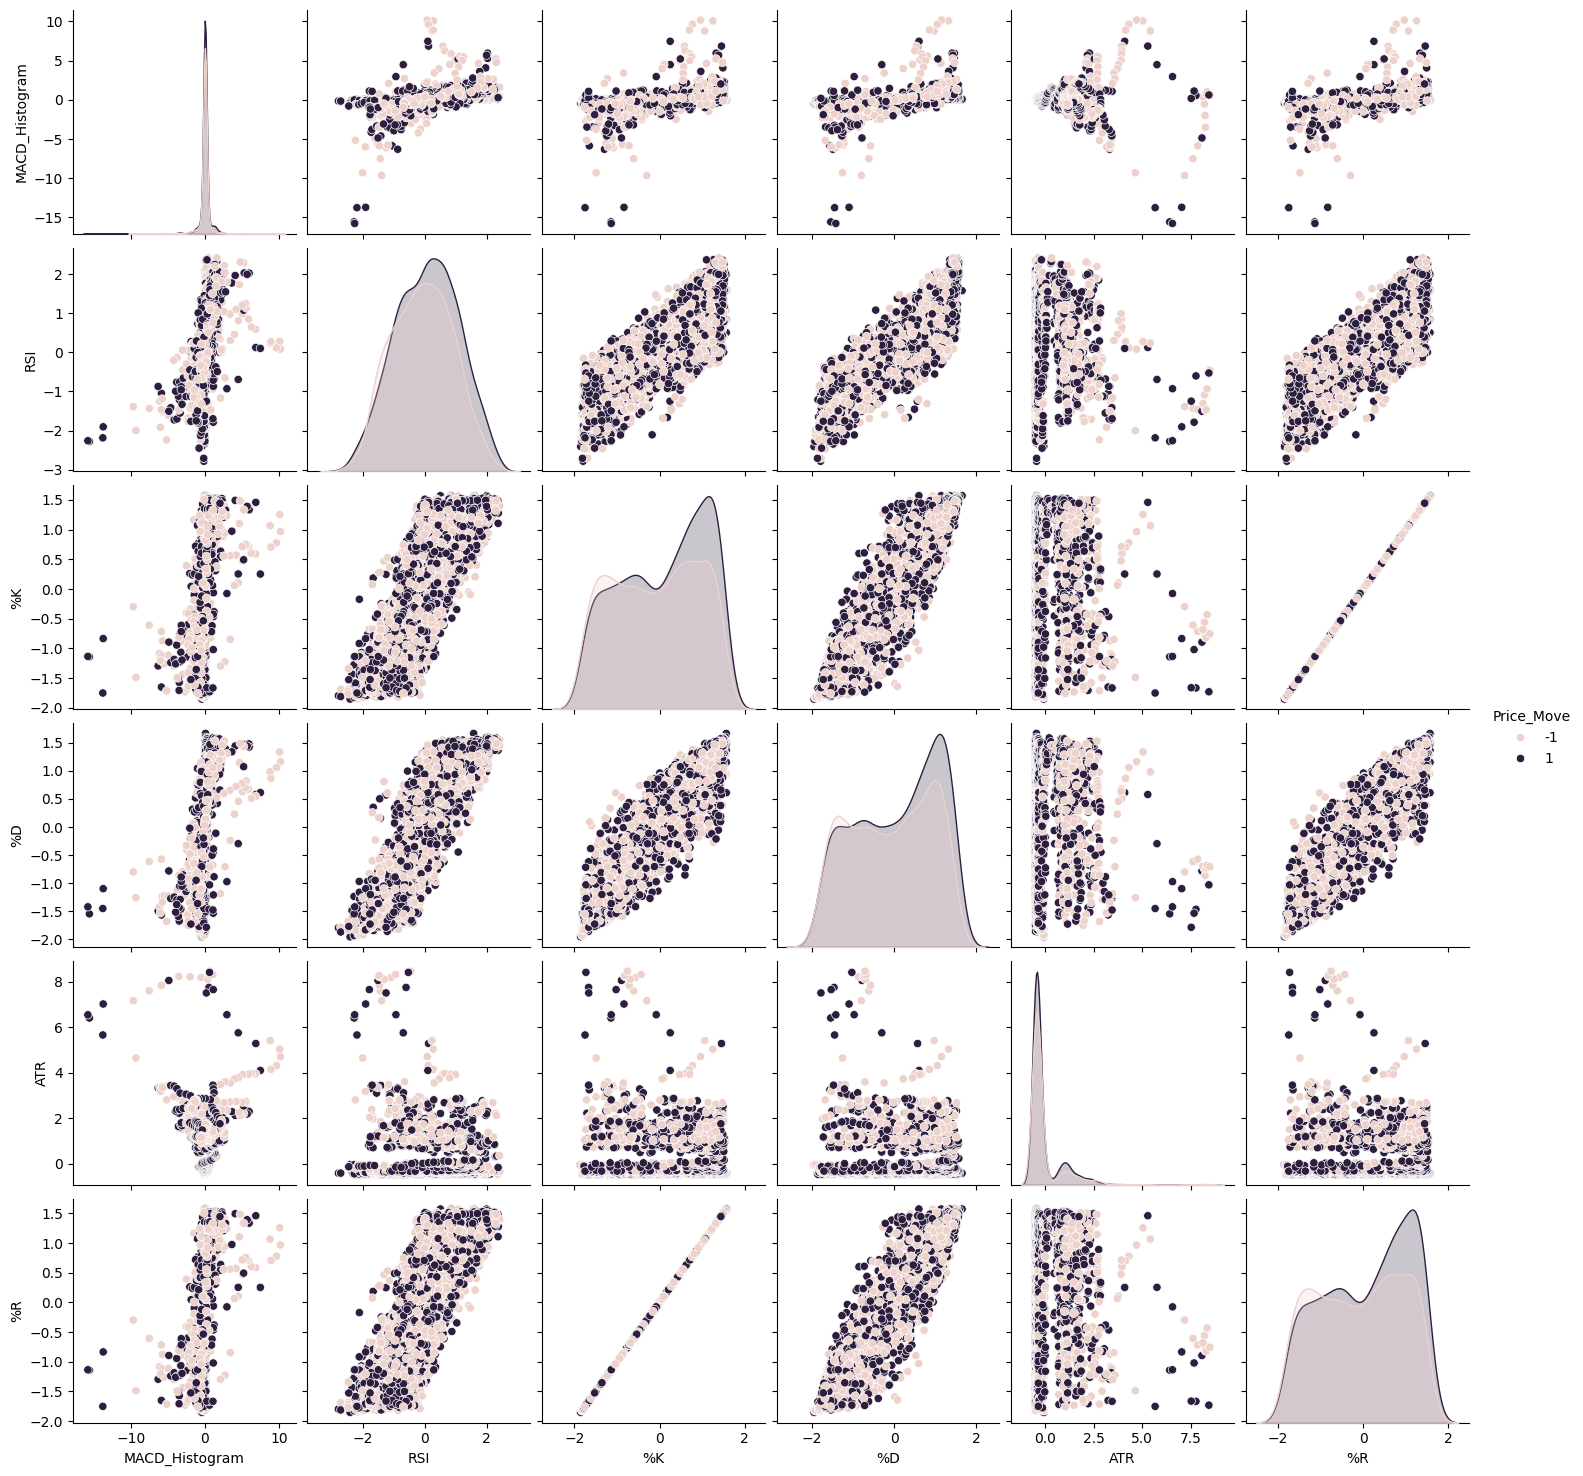

In [759]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Extract the features to be normalized
features_to_normalize = ['MACD_Histogram', 'RSI', '%K', '%D', 'ATR', '%R']

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the selected features
normalized_features = scaler.fit_transform(recent_data[features_to_normalize])

# Replace the original features with the normalized ones in your dataset
recent_data[features_to_normalize] = normalized_features
normalized_data=recent_data[features_to_normalize] 
# Add 'price_move' to the DataFrame of normalized features
normalized_data['Price_Move'] = recent_data['Price_Move']

# Create pairwise plots
sns.pairplot(normalized_data, hue='Price_Move', diag_kind='kde')
plt.show()

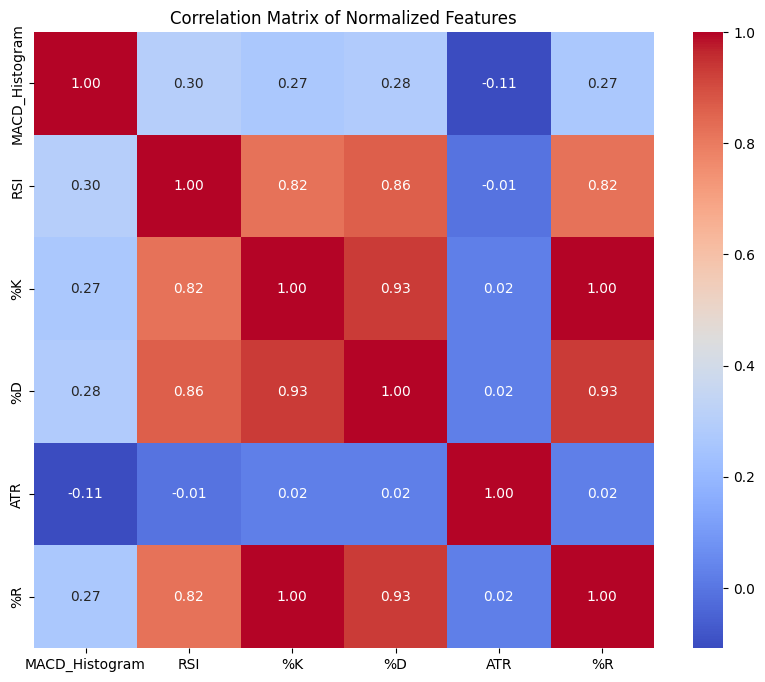

In [760]:
# Compute the correlation matrix
non_tar_data=normalized_data.drop('Price_Move',axis=1)
correlation_matrix = non_tar_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Normalized Features')
plt.show()


In [761]:
# # Calculate correlation matrix
# correlation_matrix = normalized_features_df.corr()

# # Plot heatmap of correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()
# # 0-0.3 weak correlation , 0.3-0.7 modeate correlation , 0.7-1 strong relation 

In [762]:
print(recent_data)

                   Open         High          Low        Close   Volume  \
Date                                                                      
2009-02-09    20.155670    20.692133    20.086697    20.393246  2141366   
2009-02-10    20.247635    21.987307    20.247635    20.841576  1062260   
2009-02-11    20.308945    21.056162    20.079033    20.795593   317703   
2009-02-12    20.998684    21.220930    20.385582    20.634653   227290   
2009-02-13    20.768770    21.611782    20.542688    20.991018   722792   
...                 ...          ...          ...          ...      ...   
2023-11-01  2299.000000  2312.250000  2207.000000  2217.300049  1666579   
2023-11-02  2247.000000  2297.949951  2204.199951  2215.300049  2340997   
2023-11-03  2215.300049  2279.000000  2215.000000  2229.850098  1853300   
2023-11-06  2253.949951  2260.000000  2233.000000  2246.000000   770061   
2023-11-07  2257.000000  2260.000000  2226.649902  2233.350098   641554   

            MACD_Line  S

### Classifier

In [763]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['MACD_Histogram', 'RSI', '%K', '%D', '%R']

X = recent_data[features]
y = recent_data['Price_Move']

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)
# Initialize Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
predictval=classifier.predict(X_val)
predicttest= classifier.predict(X_test)

# Calculate accuracy
accuracy1 = accuracy_score(y_val, predictval)
accuracy2 = accuracy_score(y_test, predicttest)
print("Accuracy:", accuracy1)
print("Accuracy:", accuracy2)

Accuracy: 0.5302197802197802
Accuracy: 0.5668498168498168


In [764]:
future_data[features]
future_predictions = classifier.predict(future_data[features])

count = sum(future_predictions[i] == future_data['Price_Move'][i] for i in range(len(future_predictions)))
print(count/future_data.shape[0])

Predicted price move for future_data:
1.0


In [765]:
# Reset warnings to default behavior
warnings.resetwarnings()